# Patient data project

# Are there factors that determine if a patient will not show up for an appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Getting medical treatment if you are sick or for prevention causes is the major source for people not to get sick. The doctor's office is one of the key institutions of the health system helping improve public health. In most countries this is a scarce resource. However, you will find patients that did not show up for their appointment. This is a burden for the healthcare system as resources could be allocated more efficiently. In this analysis I will investigate some variables that may influence the decision for showing up or not. By knowing this resources could be allocated more efficiently by having more knowledge about a patient and its likelihood to show up.

The data set that will be investigated contains information about patients and their appointment. The data is saved in a csv format and can be accessed easily with Jupyter Notebook. The information collected consists of appointment details like date and patient details like age, gender, neighbourhood and certain disease.

The question that will be tried to answer is: Are the variables that can be associated to a patient that doesn't show up to an appointment. With this said the dependent variable is whether a patient shows up or not. After the data analysis it should be known if age, gender, SMS received, a certain neighbourhood or some disease can be used for better predict if a patient shows up or not.

In [1]:
# import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df.shape

(110527, 14)

The dataset has:
- 110527 rows / records
- 14 columns

In [3]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
# rename column names to get consistent names
df = df.rename(columns={'PatientId': 'PatientID', 'No-show': 'No_show'})
# check if it worked
df.head(0)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [5]:
# find missing data or errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data shows that there is no missing value but some data types are not correct. E.g. ScheduledDay and Appointment Day have no date format

In [6]:
#Check if there are duplicates
df.duplicated().sum()

0

There are no duplicated records

In [7]:
#change data type from ScheduledDay and AppointmentDay into date type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# check
df.dtypes

PatientID                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
dtype: object

In [8]:
#See if there is errant data
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It seems that there is errant data. The Age value of -1 cannot to correct. Possibly the Handcap data could be wrong as well as there is 4 at max but this needs to be further investigated as it could be that there are different forms of Handcap

In [9]:
# Investigate Handcap
df['Handcap'].nunique()

5

>Possibly there are different forms of Handcap (0-4)

In [10]:
# Investigate other variables
df.nunique()

PatientID          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

Everything should be okay from this point of view. It can be seen that the data of AppointmentDate is not well maintained as there are only 27 different values which indicates that this only describes the appointment day but not the time.

### Data Cleaning: Delete rows with Age value < 0

In [11]:
# get a better idea of the Age value
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
df = df.drop(df[(df.Age < 0)].index)
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

>One line was removed as there are now 110526 rows and the min value is 0 which indicates that -1 one does not exist anymore

<a id='eda'></a>
## Exploratory Data Analysis
### Getting to know the data

In [13]:
# How many female and male patients are in the dataset?
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

>There are 71839 female and 38687 male patients in the dataset --> A lot more women than men

In [14]:
# How many patients didn't show up?
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

>22319 patients didn't show up compared to 88207 that did

In [15]:
ratio_noshow = df['No_show'].value_counts()[1] / df.shape[0]
ratio_show = df['No_show'].value_counts()[0] / df.shape[0]
print(ratio_noshow)

0.20193438647919945


>That means that about 20% of the patients did not show up which is quite substantial

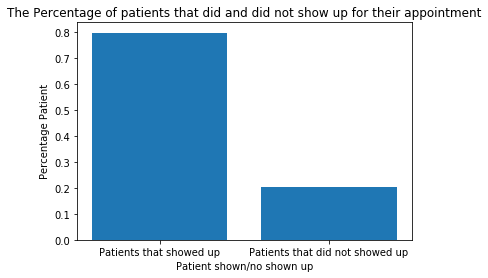

In [16]:
#Plotting the percentage of patient show up/No show up
plt.bar([1,2], [ratio_show, ratio_noshow], tick_label=['Patients that showed up', 'Patients that did not showed up'])
plt.title('The Percentage of patients that did and did not show up for their appointment')
plt.xlabel('Patient shown/no shown up')
plt.ylabel('Percentage Patient');

In [17]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

>In the mean patients are 37.09 years old with the oldest patient has a age of 115

### Is the Gender a variable that can desribe if a patient is likely to show up or not?

In [18]:
df.groupby('No_show').Gender.value_counts()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

In [19]:
df[df.No_show=='Yes'].Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [20]:
df[df.No_show=='Yes'].Gender.value_counts()[1]

7725

In [21]:
# visualize the data for better understanding. 
# Important: Everything has to be relative as a comparison of absoult numbers does not make sense

def ratio_calc (total_sample, total_population):
    ratio = total_sample / total_population
    return ratio

total_male = df[df.Gender=='M'].Gender.value_counts()
total_female = df[df.Gender=='F'].Gender.value_counts()

ratio_male_noshow = ratio_calc(df[df.No_show=='Yes'].Gender.value_counts()[1], total_male)
ratio_male_show = ratio_calc(df[df.No_show=='No'].Gender.value_counts()[1], total_male)
ratio_female_noshow = ratio_calc(df[df.No_show=='Yes'].Gender.value_counts()[0], total_female)
ratio_female_show = ratio_calc(df[df.No_show=='No'].Gender.value_counts()[0], total_female)

print(ratio_male_noshow, ratio_female_noshow)

M    0.199679
Name: Gender, dtype: float64 F    0.203149
Name: Gender, dtype: float64


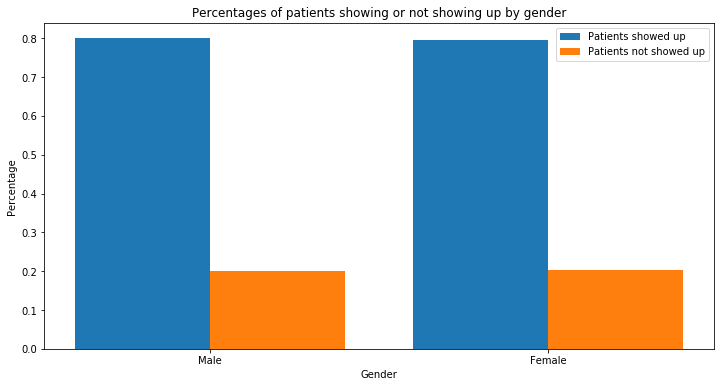

In [22]:
# plot a bar chart

labels =['Male','Female']
show =[ratio_male_show[0], ratio_female_show[0]]
noshow =[ratio_male_noshow[0], ratio_female_noshow[0]]

x = np.arange(len(labels))

bar_width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

barShow = ax.bar(x - bar_width/2, show, bar_width, label='Patients showed up')
barNohow = ax.bar(x + bar_width/2, noshow, bar_width, label='Patients not showed up')


ax.set_title('Percentages of patients showing or not showing up by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_ylabel('Percentage')
ax.set_xlabel('Gender')

ax.legend()

plt.show()

>Looking at the data and comparing the ratio of men and women that did not show up for the appointment it can be seen that relatively 19.97 % of men don't show up and 20.31% do not show up. From a data analyst perspective there are big differences which leads me to the answer that the Gender does not play a key role if a person shows up or not for an appointment

## Creating new data sheets
> In the process of analysing whether a patient shows up or not I basically compare the characteristics of patients that show up or did not show up. So I will create a new data set one for patient that show up and one for patient that did not show up.

In [23]:
# dataset for patients that did  show up
dfshow = df[df.No_show=='No']

# dataset for patients that did not show up
dfnoshow = df[df.No_show=='Yes']

### Is the age a variable that can explain if a patient is more likely to show up or not?

In [24]:
# What is the mean age of patients?
df.Age.mean()

37.089218826339504

In [25]:
# What is the mean age of patients that did show up
dfshow.Age.mean()

37.790504154999034

In [26]:
# What is the mean age of patients that did not show up
dfnoshow.Age.mean()

34.31766656212196

>There is an indicator that the people who did not show up are older than the people that did show up. But a more detailed view is necessary as even the mean from patients that do not show up seems to be lower, it could highly differ within different group of ages

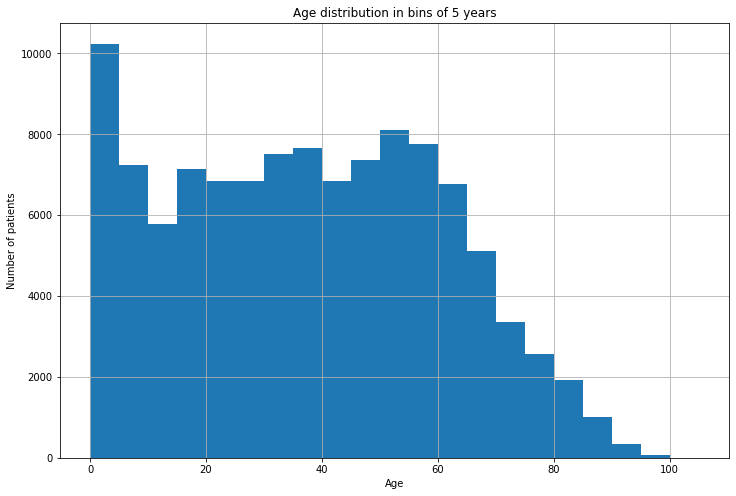

In [27]:
# Getting an overview about the age distribution and divide the group into 5 years with 21 bins 
# by a range from 0 - 105 
plt.title('Age distribution in bins of 5 years')
plt.xlabel('Age')
plt.ylabel('Number of patients')
df.Age.hist(bins=21, figsize=(12,8), range=[0, 105])

>The histogram shows the distribution of the age of the patients. It can be seen that in the group of age 0-5 are the most patients. Also patients with an age from 50-60 have a high share. But in the tendency there is a high number of patients within the age group from 0-60/65.

Let's see if there is a difference in the distribution of age in the datasets from people that did show up or did not show up

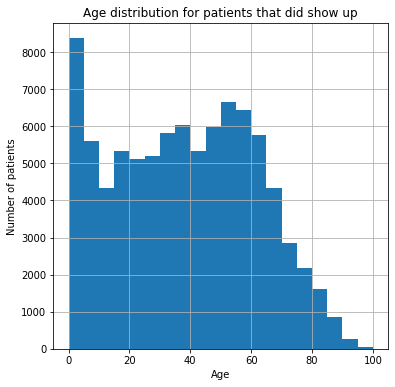

In [28]:
# age distribution for people that did show up
plt.title('Age distribution for patients that did show up')
plt.xlabel('Age')
plt.ylabel('Number of patients')
dfshow.Age.hist(bins=20, figsize=(6,6), range=[0, 100])

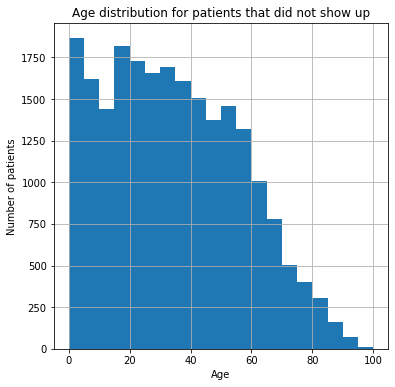

In [29]:
# age distribution for people that did not show up
plt.title('Age distribution for patients that did not show up')
plt.xlabel('Age')
plt.ylabel('Number of patients')
dfnoshow.Age.hist(bins=20, figsize=(6,6), range=[0, 100])

>It is difficult to get answers from this graphs. In order to really answer the question if age could be a interesting variable the relative ratio from show patients to no show patients for every age needs to be calculated and compared. Only then you can see if there are patients with a certain age that have a higher percentage of not showing up.

In [30]:
# calculating a list of percentages for every age with the 
# ratio from patients that did not show up to the total amount of patients in this age

age_ratio = []
for x in range(101):
    n = dfnoshow[dfnoshow.Age==x].Age.count() / df[df.Age==x].Age.count()
    i = int(n)
    age_ratio.append(n)
    
# to check if its work  
# print(age_ratio)
max(age_ratio)

0.2826475849731664

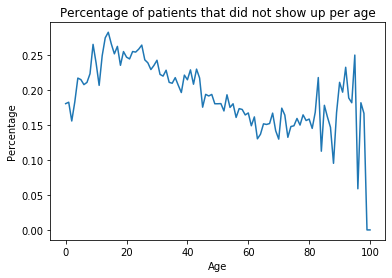

In [31]:
# plot the percentage of no shown up patients of one age
plt.plot(age_ratio)
plt.title('Percentage of patients that did not show up per age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

<BarContainer object of 101 artists>

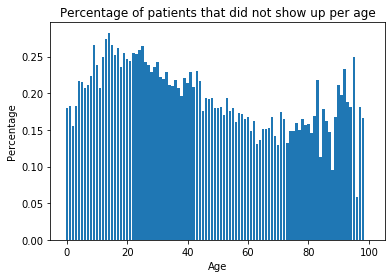

In [32]:
# plot the percentage of no shown up patients of one age in a bar chart
ages = []
for x in range(101):
    n = x
    ages.append(n)

plt.title('Percentage of patients that did not show up per age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.bar(ages, age_ratio)


>The data shows that there are a big differences in the ages. There are some ages where more than 25% of the patients do not show up to their appointment. And there are some ages where only less than 10% of the patients in this age group do not show up. Although the data shows that there are differences it is difficult to describe a clear tendency. If you look at the trend of the data it can be seen that at around age 15 patients have the highest percentage of not showing up. Then till around age 70 the percentage decreases more or less steady. But there can be big differences from one age to the other age. What can be seen from the data is that age is a variable that seems to influence whether a person shows up or not and there some ages where the percentage of patients that do not show up is relatively low compared to other ages. From looking at the graph you could say patients at around age 15 tend to rather not show up. Younger patients seem to be more likely to show up with a increasing percentage of not showing up till around age 15. After age 15 the share of patients not showing up decreases more or less steady till the age 70. For Patients with ages higher than 70 have a general trend is hard to describe as the data varies a lot.

### Is alcoholism a variable that can explain if a patient is more likely to show up or not?

For getting a right answer fot the variable alcohol also some data manipulations are necessary as absolute numbers dont show the right story. As there will be more people with Alcoholism in group of patients that showed because there are in absoulte numbers more people in this group. It is necessary to see the relative amount of patients with Alcoholism in the group of patients that did show up and in the group of patients that did not show up. 

In [33]:
#Getting the absolut number of patients that showed up or not
noshows = dfnoshow.Age.count()
shows = dfshow.Age.count()

def alc_ratio(alc_sample, sample):
    alc_ratio = alc_sample / sample
    return alc_ratio

#Getting the absolut number of patients with and without Alcoholism that did not show up
noshows_ratio = alc_ratio(dfnoshow[dfnoshow.Alcoholism==1].Alcoholism.count(), noshows)

#Getting the absolut number of patients with and without Alcoholism that did  show up
shows_ratio = alc_ratio(dfshow[dfshow.Alcoholism==1].Alcoholism.count(), shows)

liste = {
    "Patients that showed up": pd.Series([shows, dfshow[dfshow.Alcoholism==1].Alcoholism.count(), shows_ratio], index=['Total', 'Patients with Alcoholism', 'Percentage of People with Alcoholism']),
    "Patients that did not showed up": pd.Series([noshows, dfnoshow[dfnoshow.Alcoholism==1].Alcoholism.count(), noshows_ratio], index=['Total', 'Patients with Alcoholism', 'Percentage of People with Alcoholism']),
}

li = pd.DataFrame(liste)
li

,Patients that showed up,Patients that did not showed up
Total,88207.000000,22319.000000
Patients with Alcoholism,2683.000000,677.000000
Percentage of People with Alcoholism,0.030417,0.030333


>The analysis shows that looking at if people had Alcoholism or not, more or less the same percentage of people of the people that did show up also did not show up. This indicates that looking at Alcoholism this does not seem to make a difference whether a patient shows up or not.

### Is Neighbourhood a variable that can explain if a patient is more likely to show up or not?

In [34]:
#Getting total number of patients per neighbourhood
nb_total = df.groupby('Neighbourhood').PatientID.count()
nb_total
nb_noshow = df[df.No_show=='Yes'].groupby('Neighbourhood').PatientID.count()
nb_show = df[df.No_show=='No'].groupby('Neighbourhood').PatientID.count()
#print(nb_noshow, nb_show)

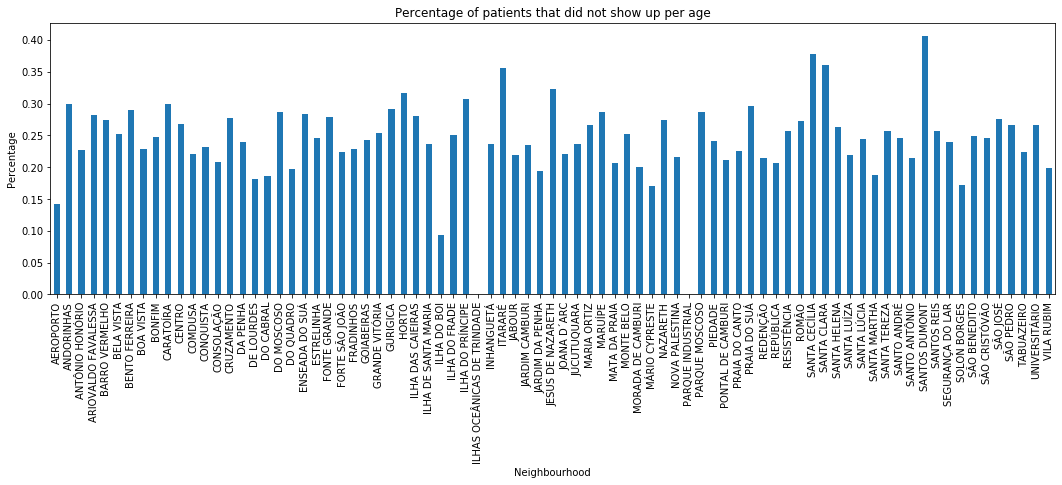

In [35]:
ratio = nb_noshow / nb_show
plt.figure(figsize=(18,5))
plt.title('Ratio of patients that did not show up per Neighbourhood')
plt.title('Percentage of patients that did not show up per age')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage')
ratio.plot(kind='bar');

> The data shows that the ratio of total patients that did not showed up and patients that did per Neighbourhood varies a lot. This indicates that it also depends on the Neighbourhood when you ask the question whether a patient is likely to show up or not. E.g. in Santos Dumont there is a high percentage of patients dont showing up.
There are also two Neighbourhoods where the data is errant or in which every patient showed up. This needs further investigation.

In [36]:
df[df.Neighbourhood=='PARQUE INDUSTRIAL'].groupby('No_show').PatientID.count()

No_show
No    1
Name: PatientID, dtype: int64

In [37]:
df[df.Neighbourhood=='ILHAS OCEÂNICAS DE TRINDADE'].groupby('No_show').PatientID.count()

No_show
Yes    2
Name: PatientID, dtype: int64

> It can be senn that in those Neighbourhoods either every patient showed up (PARQUE INDUSTRIAL) or any patient showed up (ILHAS OCEÂNICAS DE TRINDADE)

<a id='conclusions'></a>
# Conclusion

For the investigation of this data set and finding variables that indicate whether a patient is more likely to show up or not for an appointment certain steps have been conducted.
First the data wranling and cleaning was done for a better quality of the data.
Then the EDA took place with the goal of answering certain questions and finding variables that can indicate or not whether a patient shows up. For this I investigated the variables Age, Gender, Alcoholism and Neighbourhood. From the analysis it can be said that there are some variables that can indicate whether a patient will show up or not. The percentage of patients that dont showed up in relation to patients that did not show up varies a lot when you look at the age variable and Neighbourhood. So with this said those variables could be a relevant factor for determining the likelyhood of showing up for a patient. The analysis also shows that Gender and Alcoholism, investigated with the basic tools, have more or less the same percentage wihtin the investigated groups of patients that did not show up.
This analsis shows to a certain amount what can be said about the data. To predict if a patient will show up or not a more detailed analysis is necessary.

### Limitations
This analysis gives a good overview about some of the variables within the data set. The statistical analysis however have been basic ones so for more profound knowledge about the data a more detailed analysis is necessary. Also further methods like regression can give a better understanding about the variables and which of them incluences the dependent variable (showing up). Also further information, e.g. at which doctor offices the appointment was scheduled or which medical investigation was the reason for the appointment, can also give a more comprehensive picture of the dataset.

### Final thoughts
Patient data can help allocate the resources of the healthcare system in a more efficient way by not having empty spaces or insufficient medical treatment because some patients have a big chance of not showing up to the doctors office. This analysis shows that the data indeed gives intersting insights of patients attributes. Further investigations need to be made.